# Safari CNN (TensorFlow)

Bu görevde, bir safari macerasında bulabileceğiniz hayvanların görüntülerini sınıflandıran evrişimli bir sinir ağı modeli geliştirmek için öğrendiklerinizi kullanmalısınız.

## Verileri keşfetme

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data_path = r"C:\Users\PC\Documents\Machine Learning Challenge\Notebook\safari\training"

In [3]:
# Sınıf isimlerini alın
classes = os.listdir(data_path)
classes.sort()

print(len(classes), "classes: ")
print(classes)

4 classes: 
['elephant', 'giraffe', 'lion', 'zebra']


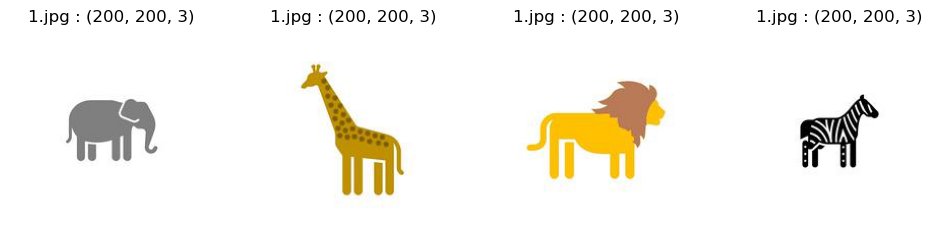

In [4]:
# Her klasördeki ilk resmi gösterin
fig = plt.figure(figsize=(12,12))
i = 0
for sub_dir in os.listdir(data_path):
    i += 1
    img_file = os.listdir(os.path.join(data_path, sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a = fig.add_subplot(1, len(classes), i)
    a.axis("off")
    imgplot = plt.imshow(img)
    a.set_title(img_file + " : " + str(img_shape))
plt.show()    

Artık görüntüleri gördüğünüze göre, onlar için bir CNN sınıflandırıcısı eğitmek için tercih ettiğiniz çerçeveyi (PyTorch veya TensorFlow) kullanın. Amacınız, doğruluğu %95 veya daha yüksek olan bir sınıflandırıcı yetiştirmektir.

### TensorFlow'u yükleme 

In [5]:
import tensorflow
from tensorflow import keras

In [6]:
print("TensorFlow version: ", tensorflow.__version__)
print("Keras version: ", keras.__version__)

TensorFlow version:  2.12.0
Keras version:  2.12.0


### Veri üreteçleri oluşturma

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
img_size = (200,200)
batch_size = 30

print("Veri Alınıyor...")
datagen = ImageDataGenerator(rescale=1./255, # piksel değerlerini normalleştirin
                             validation_split=0.3) # doğrulama için görüntülerin %30'unu geri alın

Veri Alınıyor...


In [9]:
print("Eğitim veri seti hazırlanıyor...")
train_generator = datagen.flow_from_directory(data_path,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              subset="training") # eğitim verisi olarak ayarlayın

Eğitim veri seti hazırlanıyor...
Found 280 images belonging to 4 classes.


In [10]:
print("Doğrulama veri kümesi hazırlanıyor...")
validation_generator = datagen.flow_from_directory(data_path,
                                                   target_size=img_size,
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   subset="validation") # doğrulama verisi olarak ayarlayın

Doğrulama veri kümesi hazırlanıyor...
Found 116 images belonging to 4 classes.


In [11]:
classnames = list(train_generator.class_indices.keys())
print("Veri oluşturucular hazır")

Veri oluşturucular hazır


### CNN'yi tanımlama

In [12]:
# Bir CNN sınıflandırıcı ağı tanımlayın
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [13]:
# Modeli bir katman dizisi olarak tanımlayın
model = Sequential()

# Giriş katmanı bir görüntüyü kabul eder ve 32 6x6 filtre ve 
# düzeltilmiş doğrusal birim aktivasyon işlevi kullanan bir evrişim uygular
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation="relu"))

# Ardından, 2x2 yama ile bir maksimum havuzlama katmanı ekleyeceğiz
model.add(MaxPooling2D(pool_size=(2,2)))

# Gerekli olduğunu düşündüğümüz kadar katman ekleyebiliriz - burada başka bir evrişim ve maksimum havuzlama katmanı ekleyeceğiz
model.add(Conv2D(32, (6, 6), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Ve bir takım daha
model.add(Conv2D(32, (6, 6), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Bir bırakma katmanı, karşılıklı bağımlılıkları azaltmak için bazı düğümleri rasgele bırakır 
# (bu, aşırı sığdırmaya neden olabilir)
model.add(Dropout(0.2))

# Şimdi özellik haritalarını düzleştireceğiz ve her sınıf için tahmin edilen olasılıkla bir çıktı katmanı oluşturacağız
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation="softmax"))

# Tanımlanan katmanlar ile artık modeli kategorik (çok sınıflı) sınıflandırma için derleyebiliriz
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 32)       0

### Modeli eğitme

In [14]:
num_epochs = 5
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    epochs=num_epochs)

Epoch 1/5
9/9 [==============================] - 26s 3s/step - loss: 1.7374 - accuracy: 0.2720 - val_loss: 1.3227 - val_accuracy: 0.2444
Epoch 2/5
9/9 [==============================] - 23s 3s/step - loss: 1.0991 - accuracy: 0.4920 - val_loss: 0.7777 - val_accuracy: 0.7222
Epoch 3/5
9/9 [==============================] - 23s 3s/step - loss: 0.6008 - accuracy: 0.7760 - val_loss: 0.3537 - val_accuracy: 0.9556
Epoch 4/5
9/9 [==============================] - 23s 3s/step - loss: 0.2589 - accuracy: 0.8960 - val_loss: 0.1370 - val_accuracy: 0.9444
Epoch 5/5
9/9 [==============================] - 23s 3s/step - loss: 0.1215 - accuracy: 0.9640 - val_loss: 0.0172 - val_accuracy: 1.0000


### Kayıp geçmişini görüntüleme

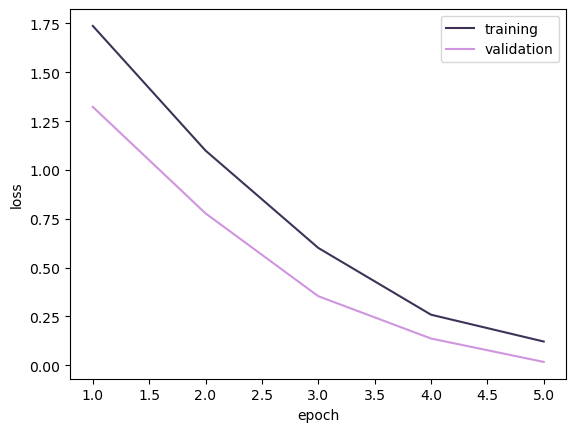

In [15]:
epoch_nums = range(1, num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss, color="#3f3258")
plt.plot(epoch_nums, validation_loss, color="#d095df")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["training", "validation"], loc="upper right")
plt.show()

### Model performansını değerlendirme

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Doğrulama verilerinden tahminler oluşturuluyor...
1/1 [==============================] - 0s 155ms/step


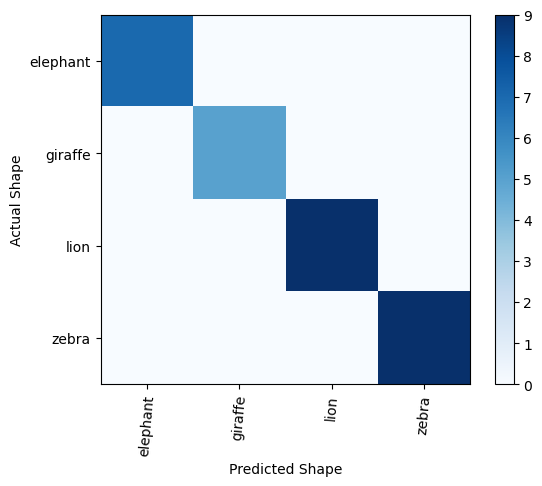

In [21]:
print("Doğrulama verilerinden tahminler oluşturuluyor...")
# Doğrulama verilerinin ilk grubu için görüntü ve etiket dizilerini alın
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Sınıfı tahmin etmek için modeli kullanın
class_probabilities = model.predict(x_test)

# Model, her sınıf için bir olasılık değeri döndürür
# Olasılığı en yüksek olan tahmin edilen sınıftır
predictions = np.argmax(class_probabilities, axis=1)

# Gerçek etiketler sıcak kodlanmıştır (ör. [0 1 0], bu nedenle 1 değerine sahip olanı alın
true_labels = np.argmax(y_test, axis=1)

# Karışıklık matrisini çizin
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

## Eğitimli modeli kullanma

In [22]:
from tensorflow.keras import models

In [23]:
# Bir görüntünün sınıfını tahmin etme işlevi
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # Model, girdi olarak bir dizi görüntü bekliyor, bu nedenle 1 görüntüden oluşan bir dizi oluşturacağız
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    
    # Girdiyi eğitim verileriyle eşleşecek şekilde biçimlendirmemiz gerekiyor
    # Oluşturucu, değerleri kayan noktalı sayılar olarak yükledi
    # ve piksel değerlerini normalleştirdi, yani...
    imgfeatures = imgfeatures.astype("float32")
    imgfeatures /= 255
    
    # Görüntü sınıfını tahmin etmek için modeli kullanın
    class_probabilities = classifier.predict(imgfeatures)
    
    # Tahmin edilen en yüksek olasılığa sahip sınıf tahminlerini bulun
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index

In [24]:
test_data_path = r"C:\Users\PC\Documents\Machine Learning Challenge\Notebook\safari\test"

1/1 [==============================] - 0s 31ms/step


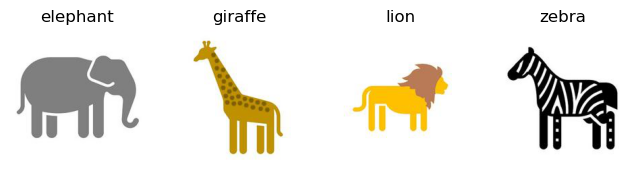

In [25]:
# Test resimlerini tahminlerle gösterin
fig = plt.figure(figsize=(8,12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Görüntü sınıfı tahminini alın
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis("off")
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()